In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# We begin importing weirdly-formatted data from the government

In [2]:
bad_data = pd.read_csv('ex-1997-2020.csv')
bad_data

,"Ano;Mês;""Valor FOB (US$)"""
0,2020;12;18451708927
1,2020;11;17344900538
2,2020;10;17649335596
3,2020;09;18223387712
4,2020;08;17403775488
...,...
283,1997;05;4654892460
284,1997;04;4624157101
285,1997;03;3824075802
286,1997;02;3142779857


# We transform it into a more reasonable format
## Month, value, and year are now in separate columns.
## Also, the data is sorted by year and month.

In [3]:
data = pd.DataFrame()
for row in range(288):
    year, month, value = bad_data.iloc[row].iloc[0].split(";")
    data = data.append({'Year': year, 'Month': month, 'Value': value}, ignore_index=True)

data.sort_values(['Year', 'Month'], ascending=[True, True], inplace=True)
data.index = [i for i in range(288)]
data


,Month,Value,Year
0,01,3680971118,1997
1,02,3142779857,1997
2,03,3824075802,1997
3,04,4624157101,1997
4,05,4654892460,1997
...,...,...,...
283,08,17403775488,2020
284,09,18223387712,2020
285,10,17649335596,2020
286,11,17344900538,2020


## In our final plot, our x-axis contains every year from 1997 to 2020. That's 24 years.
## The variable 'years' corresponds to our x-axis.

In [4]:
years = data["Year"].unique()
years

array(['1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype=object)

## Our y-axis corresponds to nominal export value, for some given period.
## For each year, we will stack the "nominal export value for each month"  in that year.
## For example, in 1979 we will stack the values for Jan / 1979 through Dec / 1979.
### The variable 'months' below is a mega-list containing 12 sub-lists, one for each month.
### For example, the first list contains the values for January: Jan/1979, Jan/1980, etc. summing 24 values.

In [5]:
months = [list() for _ in range(12)]

for base in range(0, 12):
    for row in range(0, 288, 12):
        months[base].append(float(data.iloc[base + row]["Value"]))

months

[[3680971118.0,
  3907773890.0,
  2947694137.0,
  3446768506.0,
  4528675856.0,
  3952038148.0,
  4780278337.0,
  5785343912.0,
  7480600323.0,
  9282148569.0,
  10966848594.0,
  13234232944.0,
  9663351384.0,
  11153005703.0,
  15031610457.0,
  15949177033.0,
  15757148192.0,
  15741666773.0,
  13481501333.0,
  11024617489.0,
  14827875770.0,
  16769724658.0,
  16638094632.0,
  14429715267.0],
 [3142779857.0,
  3712105426.0,
  3264023488.0,
  4120793391.0,
  4062887664.0,
  3652691211.0,
  4981697380.0,
  5715580929.0,
  7777720295.0,
  8757143569.0,
  10107260537.0,
  12763889431.0,
  9491899751.0,
  12066643269.0,
  16621034760.0,
  17926499266.0,
  15478937787.0,
  15825850012.0,
  12010576962.0,
  13103865483.0,
  15275976600.0,
  15801987736.0,
  15618080347.0,
  15356449520.0],
 [3824075802.0,
  4270735544.0,
  3825933128.0,
  4467447649.0,
  5153769468.0,
  4251755321.0,
  5209857493.0,
  7907130664.0,
  9258176578.0,
  11379482701.0,
  12858871518.0,
  12565657530.0,
  1160778

# We now set up some useful variables.
## The variable 'names' contains the labels for each month.
## The variable 'colors' contains an object that generates unique colors.

In [6]:
names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
colors = plt.cm.get_cmap('hsv', 2020 - 1996)

<Figure size 1440x720 with 0 Axes>

# Finally, we produce our plot.
## This is a bit complicated to explain. I'll leave it as an exercise to the reader.

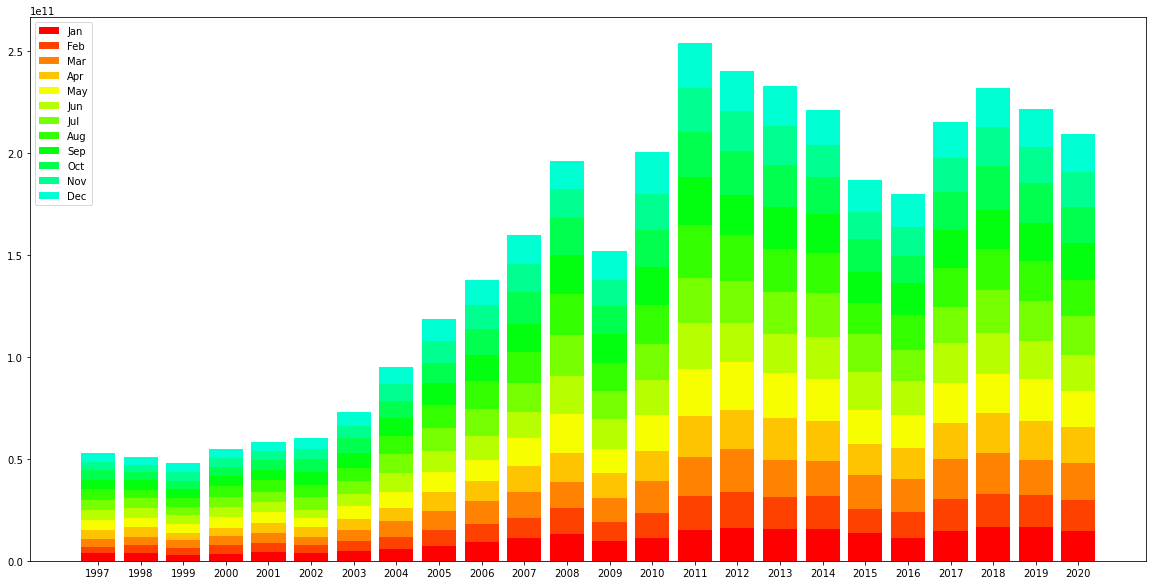

In [8]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)

for i in range(12):
    array_of_previous_months = np.zeros(2020 - 1996)
    for prev in range(i):
        array_of_previous_months = np.vstack((array_of_previous_months, months[prev]))
    plt.bar(
            years,
            months[i],
            color=colors(i),
            label=names[i],
            bottom=array_of_previous_months.sum(axis=0)
           )
    plt.legend()


plt.show()